## The FIFA World Cup

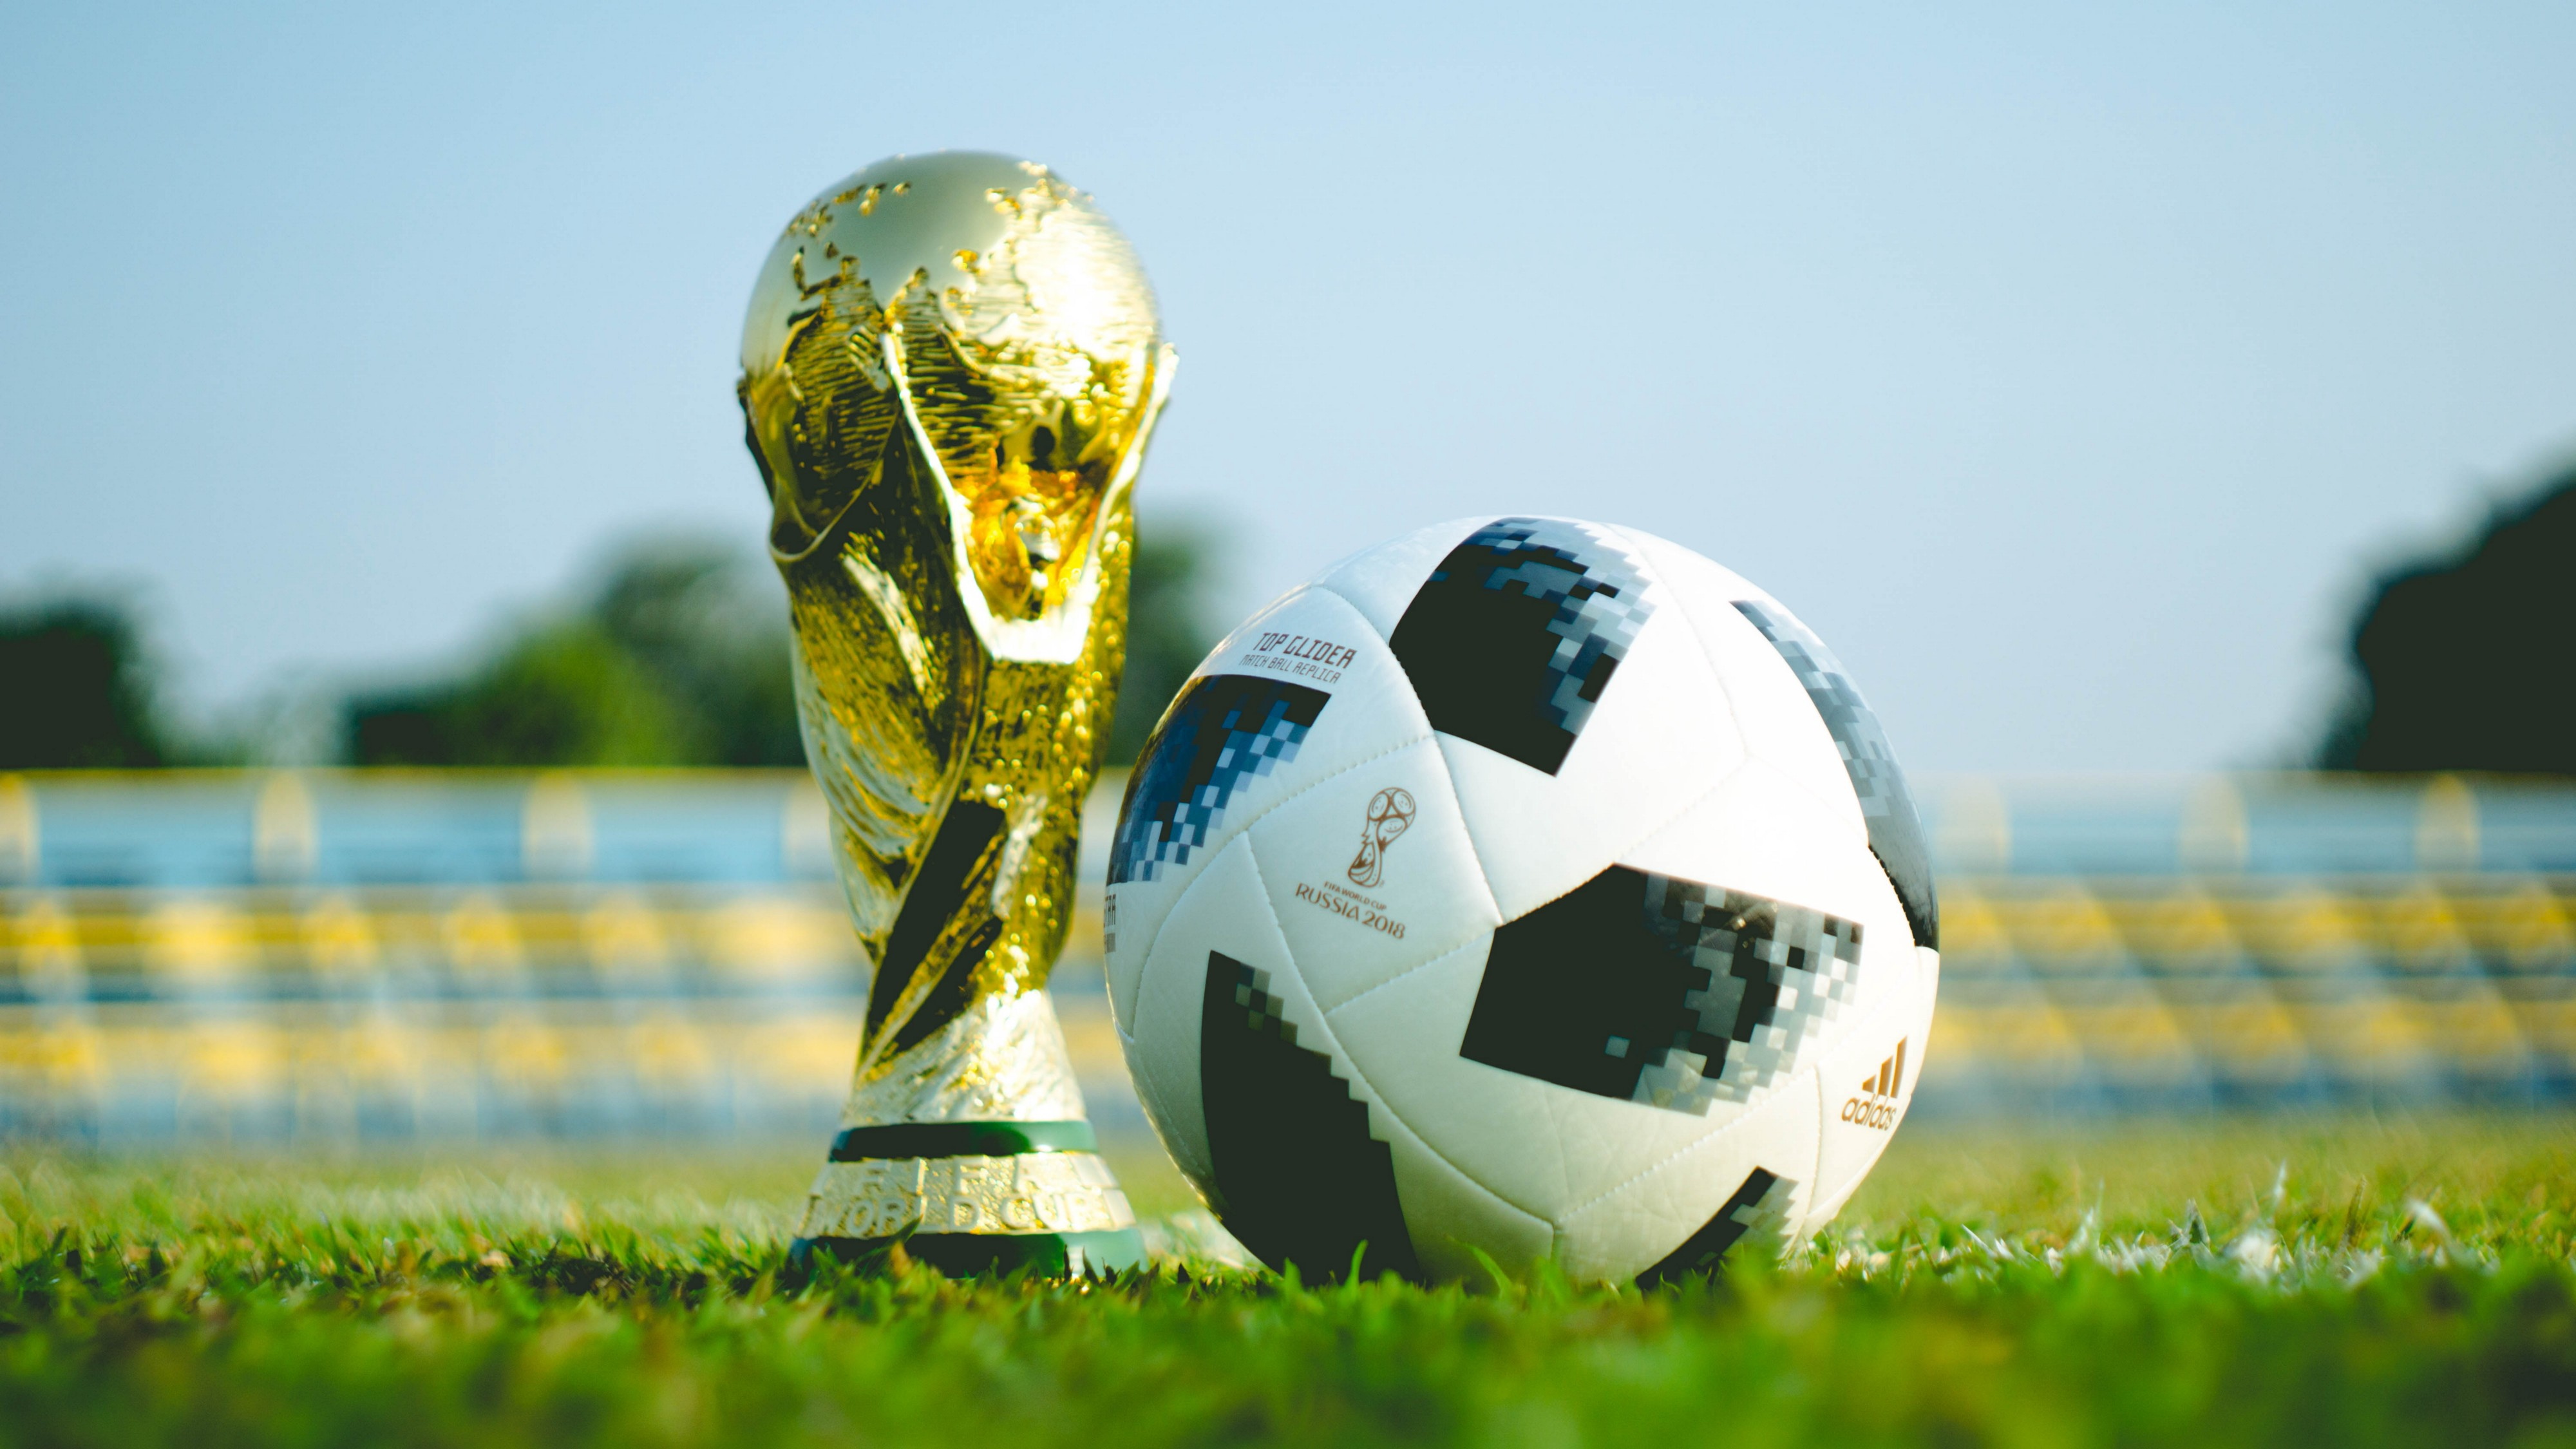

In [66]:
from IPython.display import Image
Image(filename='Image.jpg',width='800',height='50')

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as py
import cufflinks as cf

In [68]:
players=pd.read_csv("WorldCupPlayers.csv")
matches=pd.read_csv("datasets_19728_29747_WorldCupMatches.csv")
world_cup=pd.read_csv("datasets_19728_29747_WorldCups.csv")

In [69]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [70]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [71]:
world_cup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


## Data Cleaning

In [72]:
matches.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

In [73]:
matches.dropna(subset=['Year'],inplace=True)

In [74]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG


In [75]:
matches['Home Team Name'].value_counts()

Brazil                        82
Italy                         57
Argentina                     54
Germany FR                    43
England                       35
Germany                       34
Netherlands                   32
France                        31
Spain                         30
Uruguay                       28
Sweden                        27
Soviet Union                  18
Belgium                       18
Hungary                       18
Yugoslavia                    17
Mexico                        16
Poland                        16
Portugal                      16
USA                           15
Chile                         14
Korea Republic                14
Austria                       13
Switzerland                   12
Cameroon                      11
Paraguay                      11
Czechoslovakia                10
Japan                         10
Romania                        9
Scotland                       9
Nigeria                        9
          

In [76]:
names=matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

rn">Republic of Ireland       5
rn">Serbia and Montenegro     1
rn">Bosnia and Herzegovina    1
rn">United Arab Emirates      1
rn">Trinidad and Tobago       1
Name: Home Team Name, dtype: int64

In [77]:
wrong=list(names.index)
wrong

['rn">Republic of Ireland',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago']

In [78]:
correct=[name.split('>')[1] for name in wrong]
correct

['Republic of Ireland',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina',
 'United Arab Emirates',
 'Trinidad and Tobago']

In [79]:
old_name = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
new_name = ['Germany', 'Maracan Stadium', 'Maracan Stadium']

In [80]:
wrong=wrong+old_name
correct = correct + new_name

In [81]:
wrong,correct

(['rn">Republic of Ireland',
  'rn">Serbia and Montenegro',
  'rn">Bosnia and Herzegovina',
  'rn">United Arab Emirates',
  'rn">Trinidad and Tobago',
  'Germany FR',
  'Maracan� - Est�dio Jornalista M�rio Filho',
  'Estadio do Maracana'],
 ['Republic of Ireland',
  'Serbia and Montenegro',
  'Bosnia and Herzegovina',
  'United Arab Emirates',
  'Trinidad and Tobago',
  'Germany',
  'Maracan Stadium',
  'Maracan Stadium'])

In [83]:
for index,wr in enumerate(wrong):
    world_cup=world_cup.replace(wrong[index],correct[index])

for index,wr in enumerate(wrong):
    matches=matches.replace(wrong[index],correct[index])

for index,wr in enumerate(wrong):
    players=players.replace(wrong[index],correct[index])

In [85]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

Series([], Name: Home Team Name, dtype: int64)

## Most Number of World Cup Winning Title

In [88]:
winner=world_cup["Winner"].value_counts()
winner

Brazil       5
Italy        4
Germany      4
Argentina    2
Uruguay      2
Spain        1
France       1
England      1
Name: Winner, dtype: int64

In [89]:
runner_up=world_cup['Runners-Up'].value_counts()
runner_up

Germany           4
Netherlands       3
Argentina         3
Brazil            2
Italy             2
Hungary           2
Czechoslovakia    2
Sweden            1
France            1
Name: Runners-Up, dtype: int64

In [90]:
third=world_cup['Third'].value_counts()
third

Germany        4
Brazil         2
Poland         2
Sweden         2
France         2
Netherlands    1
USA            1
Chile          1
Italy          1
Austria        1
Croatia        1
Turkey         1
Portugal       1
Name: Third, dtype: int64

In [105]:
teams=pd.concat([winner,runner_up,third],axis=1)
teams.fillna(0,inplace=True)
teams=teams.astype(int)
teams.style.background_gradient(cmap='Blues')


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,Winner,Runners-Up,Third
Argentina,2,3,0
Austria,0,0,1
Brazil,5,2,2
Chile,0,0,1
Croatia,0,0,1
Czechoslovakia,0,2,0
England,1,0,0
France,1,1,2
Germany,4,4,4
Hungary,0,2,0


In [100]:
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

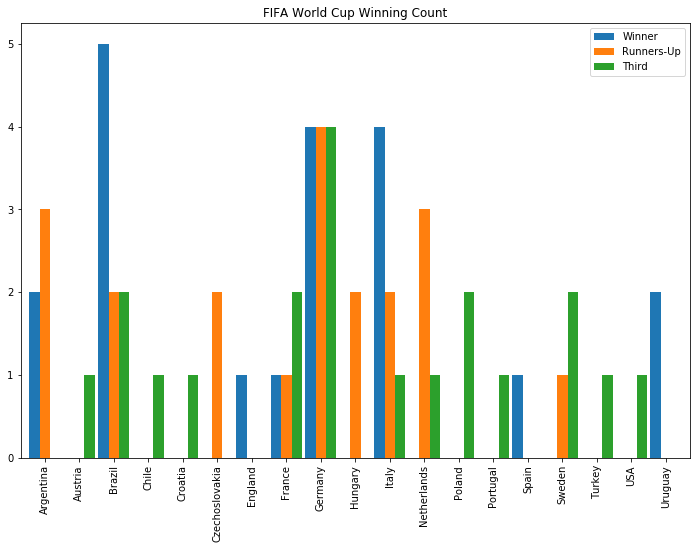

In [114]:
plt.rcParams['figure.figsize']=12,8
teams.plot(kind='bar',title='FIFA World Cup Winning Count',width=0.9)
plt.show()

## Number of Goal Per Countary

In [115]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [116]:
home = matches[['Home Team Name', 'Home Team Goals']].dropna()
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

In [118]:
home.columns=['Countries','Goals']
away.columns=home.columns

In [127]:
goals=home.append(away,ignore_index=True)
goals=goals.groupby('Countries').sum()
goals=goals.astype(int)
goals

,Goals
Countries,
Algeria,14
Angola,1
Argentina,133
Australia,11
Austria,43
Belgium,54
Bolivia,1
Bosnia and Herzegovina,4
Brazil,225


In [129]:
goals=goals.sort_values(by='Goals',ascending=False)
goals

,Goals
Countries,
Germany,235
Brazil,225
Argentina,133
Italy,128
France,108
Spain,92
Netherlands,91
Hungary,87
Uruguay,80


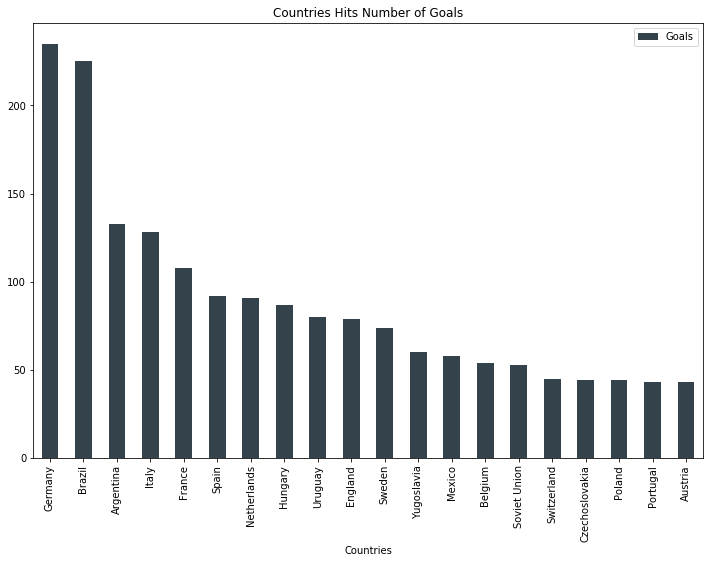

In [132]:
goals[:20].plot(kind='bar',title = 'Countries Hits Number of Goals',color=sns.color_palette('Blues_d',10))

## Attendance, Number of Teams, Goals, and Matches per Cup

In [144]:
world_cup['Attendance']=world_cup['Attendance'].str.replace(".","")
world_cup['Attendance']=world_cup['Attendance'].astype(int)
world_cup.head()                                  

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607


Text(0.5, 1.0, 'Matches Played Scored by Teams Per Year')

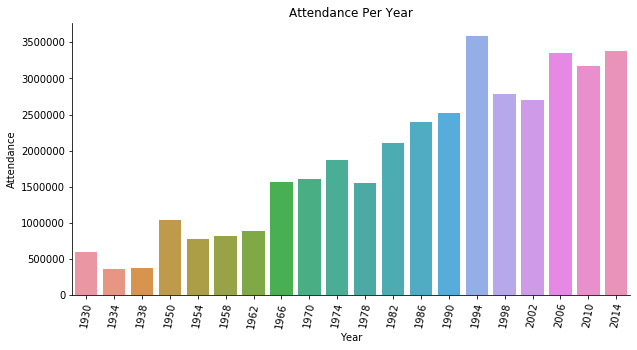

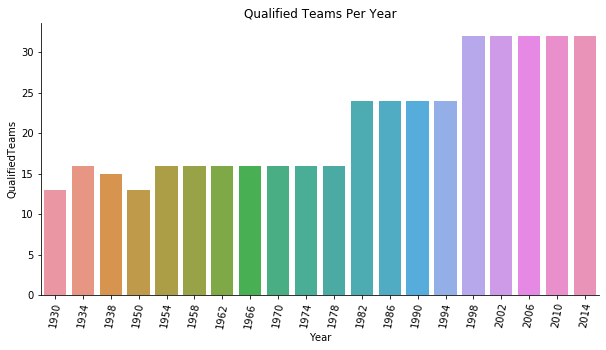

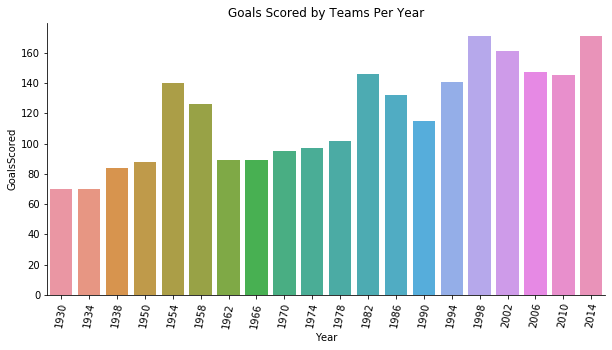

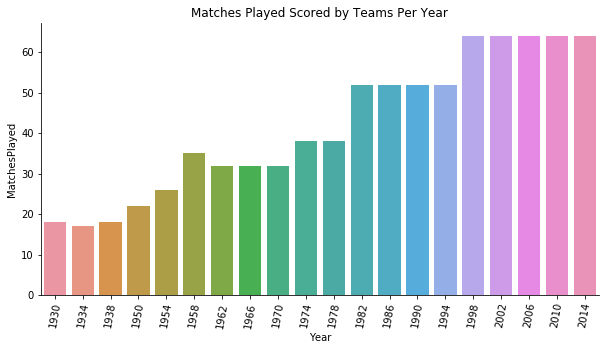

In [151]:
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'Attendance', data = world_cup)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Attendance Per Year')


fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'QualifiedTeams', data = world_cup)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Qualified Teams Per Year')


fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'GoalsScored', data = world_cup)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Goals Scored by Teams Per Year')



fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'MatchesPlayed', data = world_cup)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Matches Played Scored by Teams Per Year')


## Goals Per Team Per World Cup

In [170]:
home=matches.groupby(['Year','Home Team Name'])['Home Team Goals'].sum().to_frame()
home

Home Team Goals
Year   Home Team Name                         
1930.0 Argentina                          16.0
       Brazil                              4.0
       Chile                               4.0
       France                              4.0
       Paraguay                            1.0
       Romania                             3.0
       USA                                 6.0
       Uruguay                            15.0
       Yugoslavia                          6.0
1934.0 Austria                             5.0
       Czechoslovakia                      8.0
       Germany                            10.0
       Hungary                             4.0
       Italy                              12.0
       Spain                               3.0
       Sweden                              3.0
       Switzerland                         3.0
1938.0 Brazil                             13.0
       Cuba                                5.0
       Czechoslovakia                      3.0
       France                              3.0
       Hungary                            13.0
       Italy                              11.0
       Sweden                              8.0
       Switzerland                         5.0
1950.0 Brazil                             21.0
       Chile                               5.0
       England                             2.0
       Italy                               2.0
       Spain                               6.0
...                                        ...
2014.0 Australia                           2.0
       Belgium                             7.0
       Bosnia and Herzegovina              3.0
       Brazil                             11.0
       Cameroon                            1.0
       Chile                               3.0
       Colombia                            9.0
       Costa Rica                          2.0
       Croatia                             1.0
       C�te d'Ivoire                       2.0
       Ecuador                             0.0
       England                             1.0
       France                              7.0
       Germany                            12.0
       Ghana                               1.0
       Greece                              2.0
       Honduras                            1.0
       IR Iran                             0.0
       Italy                               0.0
       Japan                               1.0
       Korea Republic                      2.0
       Mexico                              1.0
       Netherlands                         6.0
       Nigeria                             3.0
       Portugal                            2.0
       Russia                              1.0
       Spain                               1.0
       Switzerland                         4.0
       USA                                 2.0
       Uruguay                             3.0

[366 rows x 1 columns]

In [171]:
away=matches.groupby(['Year', 'Away Team Name'])['Away Team Goals'].sum()
away

Year    Away Team Name        
1930.0  Argentina                  2.0
        Belgium                    0.0
        Bolivia                    0.0
        Brazil                     1.0
        Chile                      1.0
        France                     0.0
        Mexico                     4.0
        Paraguay                   0.0
        Peru                       1.0
        Romania                    0.0
        USA                        1.0
        Yugoslavia                 1.0
1934.0  Argentina                  2.0
        Austria                    2.0
        Belgium                    2.0
        Brazil                     1.0
        Czechoslovakia             1.0
        Egypt                      2.0
        France                     2.0
        Germany                    1.0
        Hungary                    1.0
        Netherlands                2.0
        Romania                    1.0
        Spain                      1.0
        Sweden                   

In [172]:
goals=pd.concat([home,away],axis=1)
goals.fillna(0,inplace=True)
goals['Goals']=goals['Home Team Goals'] + goals['Away Team Goals']
goals=goals.drop(['Home Team Goals','Away Team Goals'],axis=1)
goals=goals.astype(int)
goals

Goals
1930.0 Argentina                  18
       Belgium                     0
       Bolivia                     0
       Brazil                      5
       Chile                       5
       France                      4
       Mexico                      4
       Paraguay                    1
       Peru                        1
       Romania                     3
       USA                         7
       Uruguay                    15
       Yugoslavia                  7
1934.0 Argentina                   2
       Austria                     7
       Belgium                     2
       Brazil                      1
       Czechoslovakia              9
       Egypt                       2
       France                      2
       Germany                    11
       Hungary                     5
       Italy                      12
       Netherlands                 2
       Romania                     1
       Spain                       4
       Sweden                      4
       Switzerland                 5
       USA                         1
1938.0 Belgium                     1
...                              ...
2014.0 Australia                   3
       Belgium                     8
       Bosnia and Herzegovina      4
       Brazil                     15
       Cameroon                    1
       Chile                       7
       Colombia                   15
       Costa Rica                  6
       Croatia                     6
       C�te d'Ivoire               4
       Ecuador                     3
       England                     2
       France                     12
       Germany                    29
       Ghana                       4
       Greece                      4
       Honduras                    1
       IR Iran                     1
       Italy                       2
       Japan                       2
       Korea Republic              3
       Mexico                      6
       Netherlands                20
       Nigeria                     3
       Portugal                    4
       Russia                      2
       Spain                       4
       Switzerland                 7
       USA                         6
       Uruguay                     4

[427 rows x 1 columns]

In [173]:
goals=goals.reset_index()
goals

,level_0,level_1,Goals
0,1930.0,Argentina,18
1,1930.0,Belgium,0
2,1930.0,Bolivia,0
3,1930.0,Brazil,5
4,1930.0,Chile,5
5,1930.0,France,4
6,1930.0,Mexico,4
7,1930.0,Paraguay,1
8,1930.0,Peru,1
9,1930.0,Romania,3


In [176]:
goals.columns=['Year', 'Country', 'Goals']
goals=goals.sort_values(by=['Year','Goals'],ascending=[True, False])
goals

,Year,Country,Goals
0,1930.0,Argentina,18
11,1930.0,Uruguay,15
10,1930.0,USA,7
12,1930.0,Yugoslavia,7
3,1930.0,Brazil,5
4,1930.0,Chile,5
5,1930.0,France,4
6,1930.0,Mexico,4
9,1930.0,Romania,3
7,1930.0,Paraguay,1


In [177]:
top5=goals.groupby('Year').head()
top5.head()

,Year,Country,Goals
0,1930.0,Argentina,18
11,1930.0,Uruguay,15
10,1930.0,USA,7
12,1930.0,Yugoslavia,7
3,1930.0,Brazil,5


In [182]:
import plotly.graph_objects as go
x, y = goals['Year'].values, goals['Goals'].values
data = []
for team in top5['Country'].drop_duplicates().values:
    year = top5[top5['Country'] == team]['Year']
    goal = top5[top5['Country'] == team]['Goals']
    
    data.append(go.Bar(x = year, y = goal, name = team))
layout = go.Layout(barmode = 'stack', title = 'Top 5 Teams with most Goals', showlegend = False)

fig = go.Figure(data = data, layout = layout)
fig.show()

## Matches With Heihest Number Of Attendance

In [194]:
matches['Datetime']=pd.to_datetime(matches['Datetime'])

In [195]:
matches['Datetime'] = matches['Datetime'].apply(lambda x: x.strftime('%d %b, %y'))


In [196]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,"13 Jul, 30",Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,"13 Jul, 30",Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,"14 Jul, 30",Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,"14 Jul, 30",Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,"15 Jul, 30",Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


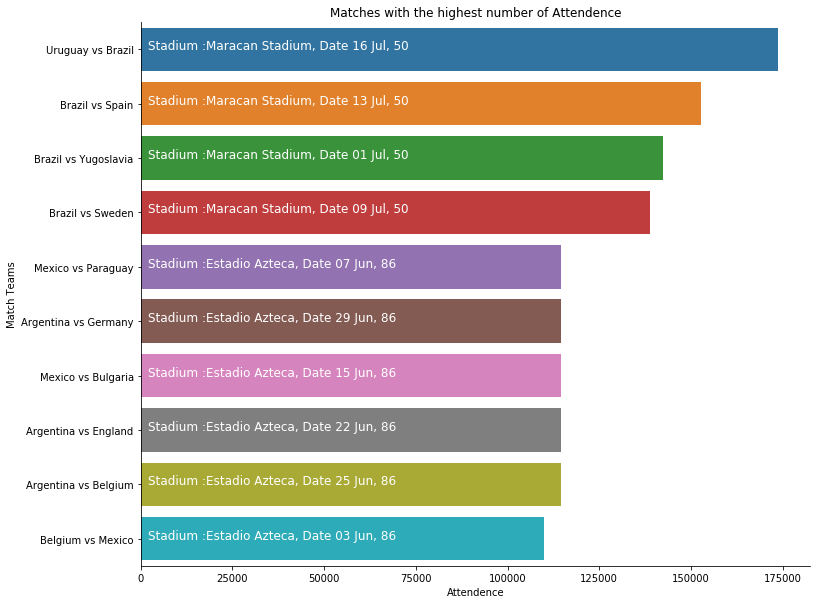

In [213]:
top10=matches.sort_values(by='Attendance',ascending=False)[:10]
top10['vs']=top10['Home Team Name']+ ' vs ' + top10['Away Team Name']

plt.figure(figsize=(12,10))
ax=sns.barplot(y=top10['vs'],x=top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Match Teams')
plt.xlabel('Attendence')
plt.title('Matches with the highest number of Attendence')

for i,s in enumerate("Stadium :"+ top10['Stadium']+ ", Date "+ top10['Datetime']):
    ax.text(2000,i,s,fontsize=12,color='white')


plt.show()

## Stadium with Highest Average Attendance

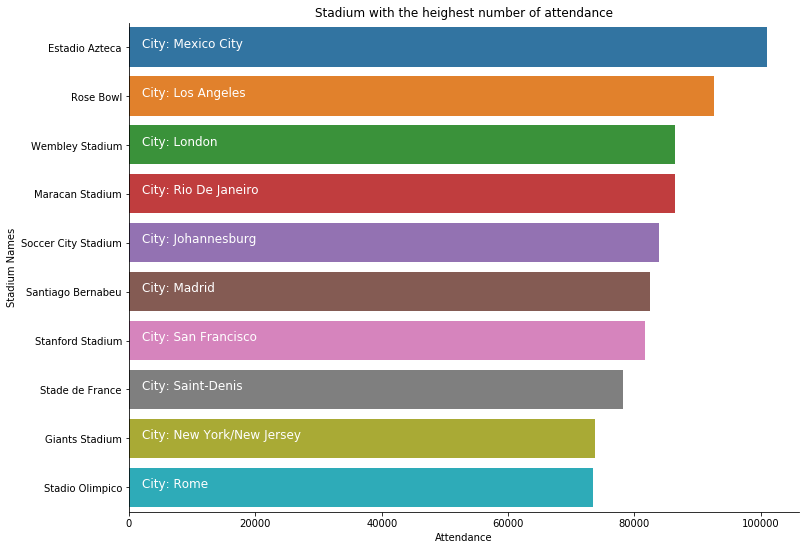

In [212]:
matches['Year'] = matches['Year'].astype(int)

std = matches.groupby(['Stadium', 'City'])['Attendance'].mean().reset_index().sort_values(by = 'Attendance', ascending =False)[:10]

top10=std

plt.figure(figsize = (12,9))
ax = sns.barplot(y = top10['Stadium'], x = top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Stadium Names')
plt.xlabel('Attendance')
plt.title('Stadium with the heighest number of attendance')
for i, s in enumerate("City: " + top10['City']):
        ax.text(2000, i, s, fontsize = 12, color = 'w')
        
plt.show()




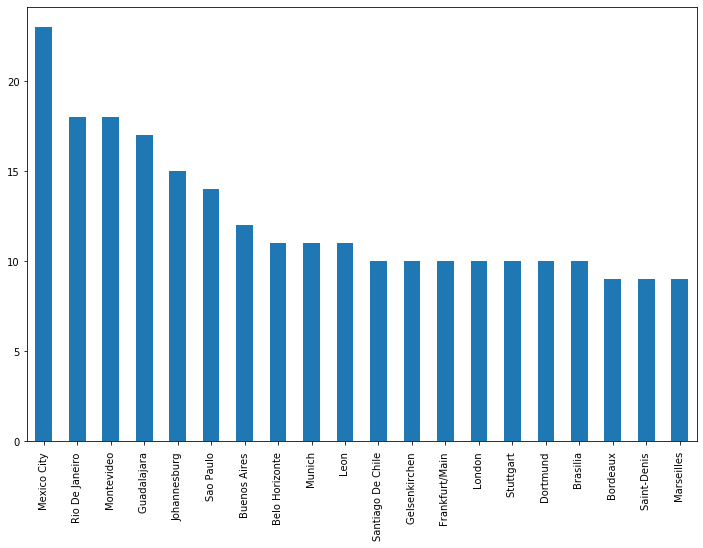

In [214]:
matches['City'].value_counts()[:20].plot(kind='bar')

## Which countries had won the cup ?

Text(0.5, 1.0, 'Number of podium by country')

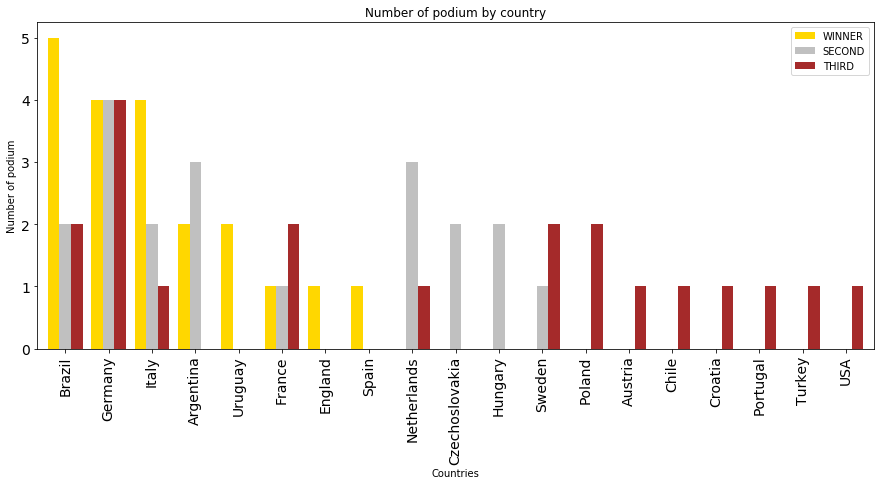

In [233]:
gold=world_cup['Winner']
silver=world_cup['Runners-Up']
bronze=world_cup['Third']


gold_count= pd.DataFrame.from_dict(gold.value_counts())
silver_count = pd.DataFrame.from_dict(silver.value_counts())
bronze_count = pd.DataFrame.from_dict(bronze.value_counts())
podium_count=gold_count.join(silver_count,how='outer').join(bronze_count,how='outer')
podium_count.fillna(0,inplace=True)
podium_count.columns=['WINNER', 'SECOND', 'THIRD']
podium_count = podium_count.astype('int64')
podium_count = podium_count.sort_values(by=['WINNER', 'SECOND', 'THIRD'], ascending=False)
podium_count.plot(y=['WINNER', 'SECOND', 'THIRD'],kind='bar',color=['gold','silver','brown'], figsize=(15, 6), fontsize=14,
                 width=0.8, align='center')

plt.xlabel('Countries')
plt.ylabel('Number of podium')
plt.title('Number of podium by country')

## Number of goal per country

Text(0.5, 1.0, 'Top 10 of Number of goals by country')

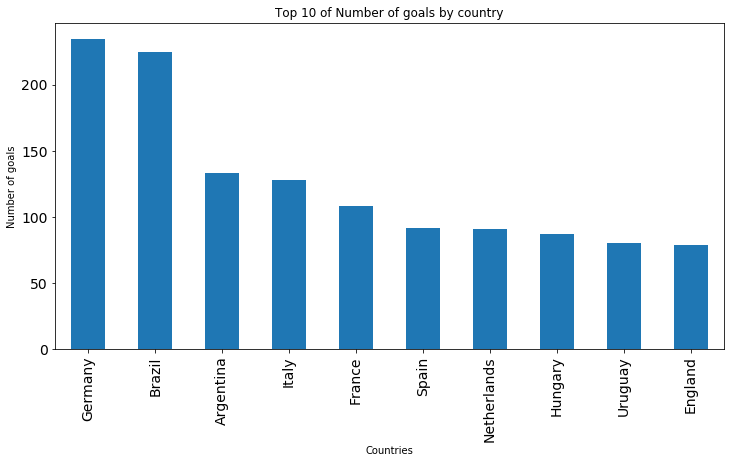

In [243]:
home = matches[['Home Team Name', 'Home Team Goals']].dropna()
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

goal_per_country=pd.DataFrame(columns=['countries', 'goals'])
goal_per_country = goal_per_country.append(home.rename(index=str, columns={'Home Team Name': 'countries', 'Home Team Goals': 'goals'}))
goal_per_country = goal_per_country.append(away.rename(index=str, columns={'Away Team Name': 'countries', 'Away Team Goals': 'goals'}))
goal_per_country['goals']=goal_per_country['goals'].astype('int64')

goal_per_country=goal_per_country.groupby(['countries'])['goals'].sum().sort_values(ascending=False)

goal_per_country[:10].plot(x=goal_per_country.index, y=goal_per_country.values, kind="bar", figsize=(12, 6), fontsize=14)
plt.xlabel('Countries')
plt.ylabel('Number of goals')
plt.title('Top 10 of Number of goals by country')


## Match outcome by home and away temas

In [244]:
def get_labels(matches):
    if matches['Home Team Goals']>matches['Away Team Goals']:
        return 'Home Team Win'
    if matches['Home Team Goals'] < matches['Away Team Goals']:
        return 'Away Team Win'
    return 'DRAW'

In [245]:
matches['Outcome']=matches.apply(lambda x : get_labels(x),axis=1)
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Outcome
0,1930,"13 Jul, 30",Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,Home Team Win
1,1930,"13 Jul, 30",Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,Home Team Win
2,1930,"14 Jul, 30",Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,Home Team Win
3,1930,"14 Jul, 30",Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,Home Team Win
4,1930,"15 Jul, 30",Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,Home Team Win


In [246]:
mt=matches['Outcome'].value_counts()
mt

Home Team Win    488
DRAW             190
Away Team Win    174
Name: Outcome, dtype: int64

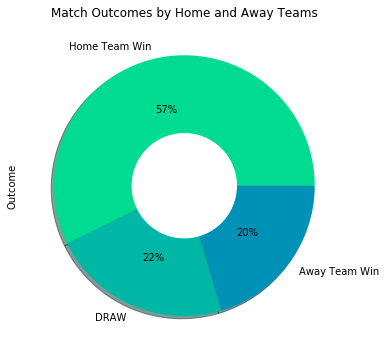

In [249]:
plt.figure(figsize=(10,6))

mt.plot.pie(autopct = "%1.0f%%", colors = sns.color_palette('winter_r'), shadow = True)

c = plt.Circle((0,0), 0.4, color =  'white')

plt.gca().add_artist(c)
plt.title('Match Outcomes by Home and Away Teams')
plt.show()